## Neural Network

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Dados/twitter.csv')
df.head(4)

,classification,label,tweets_pt,tweets_en,pt_lemma,en_lemma,pt_tokens,en_tokens
0,Normal,2,mayasolovely como mulher você não deve reclama...,mayasolovely woman shouldnt complain cleanin...,mayasolovelyr como mulher você não dever recla...,mayasolovely woman should not complain clea...,"['mayasolovelyr', 'como', 'mulher', 'você', 'n...","['mayasolovely', 'woman', 'should', 'not', 'co..."
1,Offensive,1,menino dats frio tyga dwn ruim para cuffin da...,boy dats coldtyga dwn bad cuffin dat hoe place,menino dats frio tyga dwn ruim para cuffin d...,boy dat coldtyga dwn bad cuffin dat hoe place,"['menino', 'dats', 'frio', 'tyga', 'dwn', 'rui...","['boy', 'dat', 'coldtyga', 'dwn', 'bad', 'cuff..."
2,Offensive,1,urkindofbrand cara você fodeu uma cadela e...,urkindofbrand dawg ever fuck bitch start c...,urkindofbrand cara você foder um cadela ...,urkindofbrand dawg ever fuck bitch start ...,"['urkindofbrand', 'cara', 'você', 'foder', 'um...","['urkindofbrand', 'dawg', 'ever', 'fuck', 'bit..."
3,Offensive,1,cganderson vivabased ela parece uma travesti,cganderson vivabased look like tranny,Cganderson Vivabased ela parecer um travesti,cganderson vivabase look like tranny,"['Cganderson', 'Vivabased', 'ela', 'parecer', ...","['cganderson', 'vivabase', 'look', 'like', 'tr..."


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.pt_lemma, df.label, test_size=0.2, random_state=42)


In [4]:
le = LabelEncoder()
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

train_dataset = TensorDataset(torch.Tensor(X_train.toarray()), torch.Tensor(y_train).long())
test_dataset = TensorDataset(torch.Tensor(X_test.toarray()), torch.Tensor(y_test).long())

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for X, y in train_loader:
    print('X shape: ', X.shape)
    print('y shape: ', y.shape, y.dtype)
    len_entrada = X.shape[1]
    break
len_saida = len(set(y_test))

X shape:  torch.Size([32, 24760])
y shape:  torch.Size([32]) torch.int64


In [1]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import optuna

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print('Using {} device'.format(device))

# def objective(trial):
    
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.3)
#     hidden_size = trial.suggest_int("hidden_size", 3, 16)

#     model = NeuralNetwork(hidden_size, dropout_rate).to(device)
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters())

#     with torch.no_grad():
#         model.eval()
#         y_pred = model(X.to(device))
#         y_pred = torch.argmax(y_pred, dim=1).cpu().numpy()
#         accuracy = accuracy_score(y, y_pred)

#     return accuracy

# class NeuralNetwork(nn.Module):
#     def __init__(self, hidden_size, dropout_rate):
#         super().__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(len_entrada, hidden_size),
#             nn.ReLU(),
#             nn.Dropout(dropout_rate),
#             nn.Linear(hidden_size, hidden_size),
#             nn.ReLU(),
#             nn.Dropout(dropout_rate),
#             nn.Linear(hidden_size, len_saida)
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits


# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)

# best_params = study.best_params
# print("Best Params:", best_params)

# best_model = NeuralNetwork(best_params["hidden_size"], best_params["dropout_rate"]).to(device)
# print(best_model)

In [19]:
def summary(model, input_size):
    total_params = 0
    total_output = 0
    trainable_params = 0

    def hook(module, input, output):
        nonlocal total_output
        total_output += torch.prod(torch.tensor(output.shape))
        
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            module.register_forward_hook(hook)
            params = sum(p.numel() for p in module.parameters() if p.requires_grad)
            total_params += params
            trainable_params += params
            print(f"{name}:\t{module.__class__.__name__}\t{params}")
    
    print(f"\nTotal params: {total_params}")
    print(f"Trainable params: {trainable_params}")
    print(f"Non-trainable params: {total_params - trainable_params}")
    print(f"Total output size: {total_output}")

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print('Using {} device'.format(device))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(len_entrada, 5),
            nn.ReLU(),
            nn.Dropout(0.08),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Dropout(0.08),
            nn.Linear(5, len_saida)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

input_size = (1, len_entrada)
summary(model, input_size)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=24760, out_features=5, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.08, inplace=False)
    (3): Linear(in_features=5, out_features=5, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.08, inplace=False)
    (6): Linear(in_features=5, out_features=3, bias=True)
  )
)
linear_relu_stack.0:	Linear	123805
linear_relu_stack.3:	Linear	30
linear_relu_stack.6:	Linear	18

Total params: 123853
Trainable params: 123853
Non-trainable params: 0
Total output size: 0


In [20]:
L2_PENALTY = 1e-4

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=L2_PENALTY)

In [22]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss = 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')

    train_loss /= size
    return train_loss

In [23]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            
            loss = loss_fn(pred, y)
            test_loss += loss.item()

            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= size
    correct /= size
    print(f'Test Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} ')

    return test_loss

In [24]:
epochs = 5
train_losses = []
test_losses = []
for t in range(epochs):
    print(f'Epoch {t+1} -------------------------------')
    train_losses.append(train(train_loader, model, loss_fn, optimizer))
    test_losses.append(test(test_loader, model, loss_fn))

Epoch 1 -------------------------------
loss: 1.370672  [    0/19820]
loss: 1.154269  [ 3200/19820]
loss: 0.936870  [ 6400/19820]
loss: 0.949479  [ 9600/19820]
loss: 1.135286  [12800/19820]
loss: 0.939777  [16000/19820]
loss: 0.818275  [19200/19820]
Test Error: Accuracy: 64.6%, Avg loss: 0.024946 
Epoch 2 -------------------------------
loss: 0.875090  [    0/19820]
loss: 0.603830  [ 3200/19820]
loss: 0.726360  [ 6400/19820]
loss: 0.436872  [ 9600/19820]
loss: 0.660099  [12800/19820]
loss: 0.602337  [16000/19820]
loss: 0.698618  [19200/19820]
Test Error: Accuracy: 72.7%, Avg loss: 0.021364 
Epoch 3 -------------------------------
loss: 0.676238  [    0/19820]
loss: 0.621820  [ 3200/19820]
loss: 0.626226  [ 6400/19820]
loss: 0.588943  [ 9600/19820]
loss: 0.582859  [12800/19820]
loss: 0.458049  [16000/19820]
loss: 0.494859  [19200/19820]
Test Error: Accuracy: 73.0%, Avg loss: 0.020773 
Epoch 4 -------------------------------
loss: 0.570732  [    0/19820]
loss: 0.519835  [ 3200/19820]
los

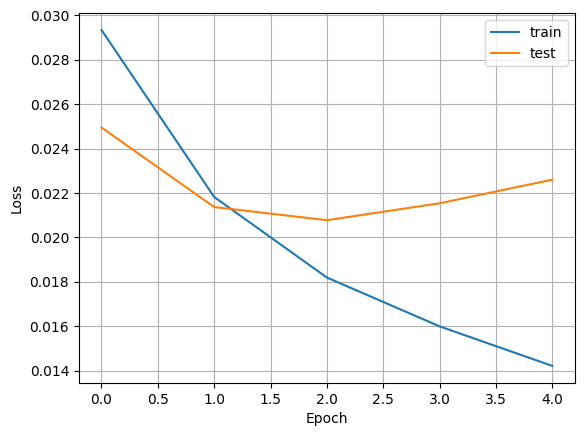

In [25]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks()
plt.yticks()
plt.legend()
plt.grid(True)
plt.show()

### Keras

In [4]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [5]:
# tokenizer = Tokenizer()

# tokenizer.fit_on_texts(X_train)

# X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

# vocab_size = len(tokenizer.word_index) + 1

In [6]:
# max_length = max(len(seq) for seq in X_train)

# for x in X_test:
#     if len(x) > max_length:
#         print(f"an outlier detected: {x}")

# X_train = pad_sequences(X_train, maxlen = max_length)
# X_test = pad_sequences(X_test, maxlen = max_length)

In [7]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# from kerastuner.tuners import RandomSearch

# def build_model(hp):
#     model = Sequential()
#     model.add(Embedding(vocab_size, 60, input_length=max_length))
#     model.add(LSTM(hp.Int('units', min_value=32, max_value=128, step=32), dropout=0.3, recurrent_dropout=0.3))
#     model.add(Dropout(0.1))
#     model.add(Dense(32, activation="relu"))
#     model.add(Dropout(0.1))
#     model.add(Dense(1, activation="softmax"))

#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='my_dir',
#     project_name='my_project'
# )

# tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# best_model = tuner.get_best_models(num_models=1)[0]
# best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# best_model.summary()

In [8]:
# model = Sequential([
#     Embedding(vocab_size, 30, input_length=max_length),
#     LSTM(32, dropout=0.3, recurrent_dropout=0.3),
#     Dropout(0.3),
#     Dense(64, activation="relu"),
#     Dropout(0.3),
#     Dense(1, activation="softmax"),
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 30)            744420    
                                                                 
 lstm (LSTM)                 (None, 32)                8064      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 754,661
Trainable params: 754,661
Non-trai

In [10]:
# model_history = model.fit(
#     X_train,
#     y_train,
#     batch_size = 64,
#     epochs=5,
#     validation_data=(X_test, y_test)
# )

Epoch 1/5
310/310 [==============================] - 11s 34ms/step - loss: 0.0000e+00 - accuracy: 0.6431 - val_loss: 0.0000e+00 - val_accuracy: 0.6314
Epoch 2/5
310/310 [==============================] - 12s 37ms/step - loss: 0.0000e+00 - accuracy: 0.6431 - val_loss: 0.0000e+00 - val_accuracy: 0.6314
Epoch 3/5
170/310 [===============>..............] - ETA: 5s - loss: 0.0000e+00 - accuracy: 0.6386

KeyboardInterrupt: 

In [20]:
# pred = np.round(model.predict(X_train))
# print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

# pred = np.round(model.predict(X_test))
# print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

  1/620 [..............................] - ETA: 13s

620/620 [==============================] - 2s 3ms/step
--> Acuracia (treino): 0.6431
155/155 [==============================] - 1s 3ms/step
--> Acuracia (teste): 0.6314
